In [116]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score, RandomizedSearchCV
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score, recall_score, precision_recall_curve, precision_score, roc_auc_score, roc_curve, accuracy_score

In [117]:
df = pd.read_csv('/Users/dylanbai/Desktop/Data Science/Assignments/games.csv')

In [118]:
df.head()

,app_id,title,date_release,win,mac,linux,rating,positive_ratio,user_reviews,price_final,price_original,discount,steam_deck
0,13500,Prince of Persia: Warrior Within™,2008-11-21,True,False,False,Very Positive,84,2199,9.99,9.99,0.0,True
1,22364,BRINK: Agents of Change,2011-08-03,True,False,False,Positive,85,21,2.99,2.99,0.0,True
2,113020,Monaco: What's Yours Is Mine,2013-04-24,True,True,True,Very Positive,92,3722,14.99,14.99,0.0,True
3,226560,Escape Dead Island,2014-11-18,True,False,False,Mixed,61,873,14.99,14.99,0.0,True
4,249050,Dungeon of the ENDLESS™,2014-10-27,True,True,False,Very Positive,88,8784,11.99,11.99,0.0,True


In [119]:
df.info()# No missing values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50564 entries, 0 to 50563
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   app_id          50564 non-null  int64  
 1   title           50564 non-null  object 
 2   date_release    50564 non-null  object 
 3   win             50564 non-null  bool   
 4   mac             50564 non-null  bool   
 5   linux           50564 non-null  bool   
 6   rating          50564 non-null  object 
 7   positive_ratio  50564 non-null  int64  
 8   user_reviews    50564 non-null  int64  
 9   price_final     50564 non-null  float64
 10  price_original  50564 non-null  float64
 11  discount        50564 non-null  float64
 12  steam_deck      50564 non-null  bool   
dtypes: bool(4), float64(3), int64(3), object(3)
memory usage: 3.7+ MB


In [120]:
df.describe()

,app_id,positive_ratio,user_reviews,price_final,price_original,discount
count,5.056400e+04,50564.000000,5.056400e+04,50564.000000,50564.000000,50564.000000
mean,1.049583e+06,77.042975,1.774188e+03,8.560316,9.178613,5.718515
std,6.066192e+05,18.256988,3.910364e+04,11.474274,11.925020,18.772251
min,1.000000e+01,0.000000,1.000000e+01,0.000000,0.000000,0.000000
25%,5.270475e+05,67.000000,1.900000e+01,0.990000,1.990000,0.000000
50%,9.805305e+05,81.000000,4.800000e+01,4.990000,4.990000,0.000000
75%,1.516450e+06,91.000000,2.030000e+02,10.990000,12.990000,0.000000
max,2.488153e+06,100.000000,7.297791e+06,299.990000,299.990000,90.000000


In [121]:
import seaborn as sns

In [122]:
df.groupby('rating').count()

,app_id,title,date_release,win,mac,linux,positive_ratio,user_reviews,price_final,price_original,discount,steam_deck
rating,,,,,,,,,,,,
Mixed,12086,12086,12086,12086,12086,12086,12086,12086,12086,12086,12086,12086
Mostly Negative,1843,1843,1843,1843,1843,1843,1843,1843,1843,1843,1843,1843
Mostly Positive,8690,8690,8690,8690,8690,8690,8690,8690,8690,8690,8690,8690
Negative,303,303,303,303,303,303,303,303,303,303,303,303
Overwhelmingly Negative,14,14,14,14,14,14,14,14,14,14,14,14
Overwhelmingly Positive,1096,1096,1096,1096,1096,1096,1096,1096,1096,1096,1096,1096
Positive,13473,13473,13473,13473,13473,13473,13473,13473,13473,13473,13473,13473
Very Negative,59,59,59,59,59,59,59,59,59,59,59,59
Very Positive,13000,13000,13000,13000,13000,13000,13000,13000,13000,13000,13000,13000


In [123]:
value_counts=df['rating'].value_counts()
value_percentages=value_counts/value_counts.sum()*100
print(value_percentages)

rating
Positive                   26.645439
Very Positive              25.709991
Mixed                      23.902381
Mostly Positive            17.186140
Mostly Negative             3.644886
Overwhelmingly Positive     2.167550
Negative                    0.599241
Very Negative               0.116684
Overwhelmingly Negative     0.027688
Name: count, dtype: float64


In [124]:
def new_rating(rating):
    if rating in ['Positive','Very Postitive','Overwhelmingly Positive']:
        return 1
    else:
        return 0

In [125]:
df['new_rating']=df['rating'].apply(new_rating)
df.head()

,app_id,title,date_release,win,mac,linux,rating,positive_ratio,user_reviews,price_final,price_original,discount,steam_deck,new_rating
0,13500,Prince of Persia: Warrior Within™,2008-11-21,True,False,False,Very Positive,84,2199,9.99,9.99,0.0,True,0
1,22364,BRINK: Agents of Change,2011-08-03,True,False,False,Positive,85,21,2.99,2.99,0.0,True,1
2,113020,Monaco: What's Yours Is Mine,2013-04-24,True,True,True,Very Positive,92,3722,14.99,14.99,0.0,True,0
3,226560,Escape Dead Island,2014-11-18,True,False,False,Mixed,61,873,14.99,14.99,0.0,True,0
4,249050,Dungeon of the ENDLESS™,2014-10-27,True,True,False,Very Positive,88,8784,11.99,11.99,0.0,True,0


In [126]:
df.groupby('new_rating').count()

,app_id,title,date_release,win,mac,linux,rating,positive_ratio,user_reviews,price_final,price_original,discount,steam_deck
new_rating,,,,,,,,,,,,,
0,35995,35995,35995,35995,35995,35995,35995,35995,35995,35995,35995,35995,35995
1,14569,14569,14569,14569,14569,14569,14569,14569,14569,14569,14569,14569,14569


In [127]:
date_counts=df['date_release'].value_counts()
date_percentages=date_counts/value_counts.sum()*100
print(date_percentages)

date_release
2020-06-18    0.181948
2022-01-20    0.134483
2020-10-15    0.112728
2016-04-05    0.108773
2020-01-17    0.104818
                ...   
2010-06-04    0.001978
2007-10-26    0.001978
2006-12-14    0.001978
2012-04-09    0.001978
2023-07-03    0.001978
Name: count, Length: 4216, dtype: float64


In [128]:
df['date_release']=pd.to_datetime(df['date_release'])
boundary_date=pd.to_datetime('2020-01-01')
df['new_date']=np.where(df['date_release']< boundary_date,'Before','After')
df['new_date']=pd.get_dummies(df['new_date'],drop_first=True)
df['new_date']=df['new_date'].astype(int)
df['win']=df['win'].astype(int)
df['mac']=df['mac'].astype(int)
df['linux']=df['linux'].astype(int)
df['steam_deck']=df['steam_deck'].astype(int)
df.head()

,app_id,title,date_release,win,mac,linux,rating,positive_ratio,user_reviews,price_final,price_original,discount,steam_deck,new_rating,new_date
0,13500,Prince of Persia: Warrior Within™,2008-11-21,1,0,0,Very Positive,84,2199,9.99,9.99,0.0,1,0,1
1,22364,BRINK: Agents of Change,2011-08-03,1,0,0,Positive,85,21,2.99,2.99,0.0,1,1,1
2,113020,Monaco: What's Yours Is Mine,2013-04-24,1,1,1,Very Positive,92,3722,14.99,14.99,0.0,1,0,1
3,226560,Escape Dead Island,2014-11-18,1,0,0,Mixed,61,873,14.99,14.99,0.0,1,0,1
4,249050,Dungeon of the ENDLESS™,2014-10-27,1,1,0,Very Positive,88,8784,11.99,11.99,0.0,1,0,1


<Axes: xlabel='new_rating', ylabel='user_reviews'>

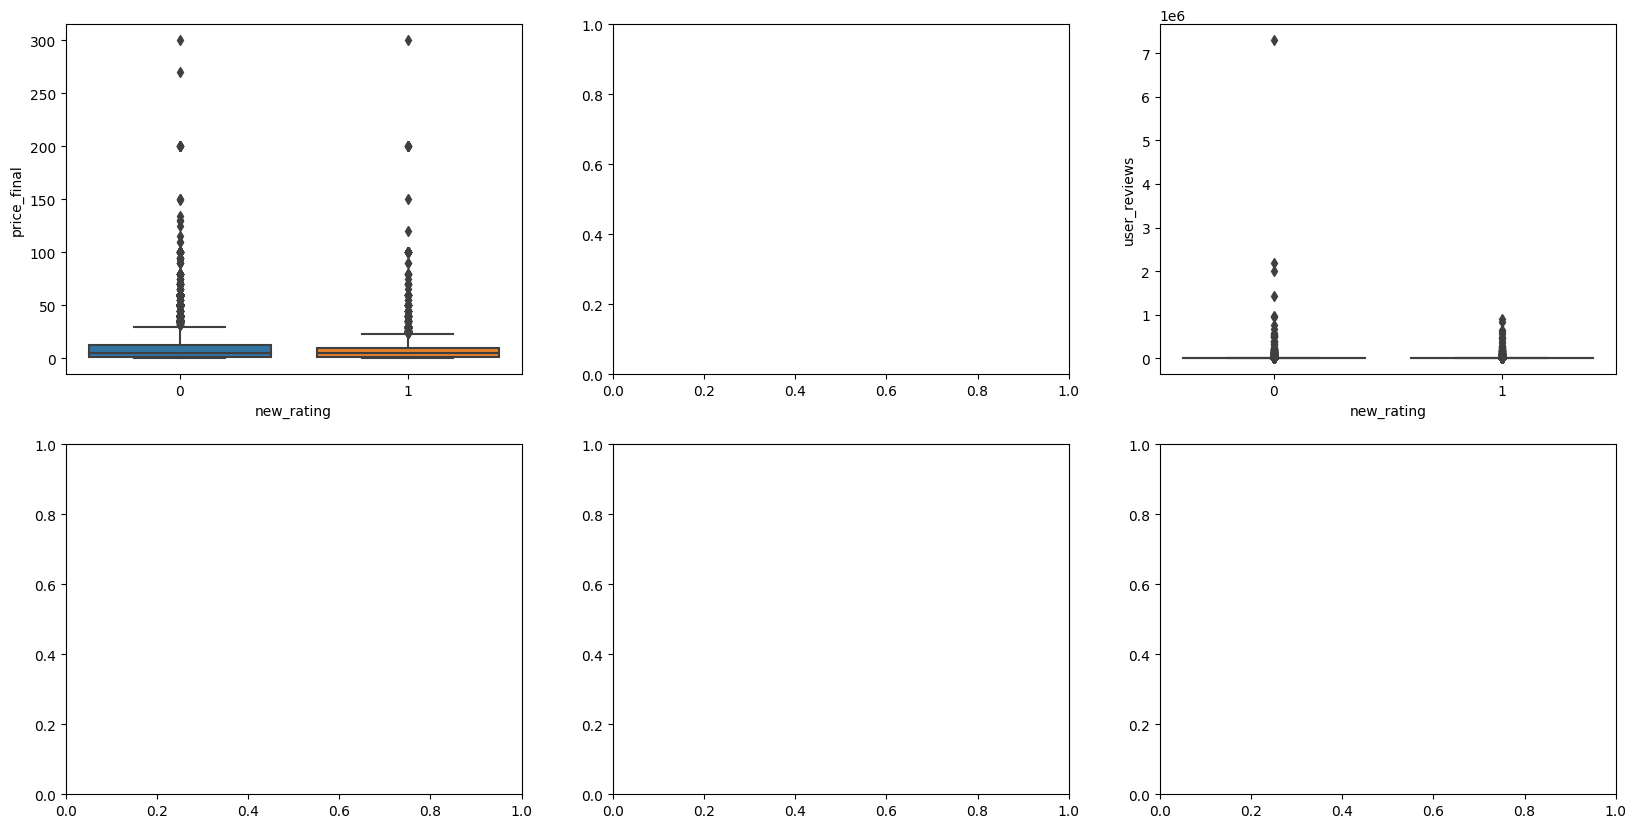

In [129]:
import matplotlib.pyplot as plt

fig, ((ax1,ax2,ax3),(ax4,ax5,ax6)) = plt.subplots(2,3, figsize=(20,10))
sns.boxplot(x='new_rating', y='price_final', ax=ax1, data=df)
sns.boxplot(x='new_rating', y='user_reviews', ax=ax3, data=df)



In [130]:
price_outliers=df[df['price_final']>100].index
df.drop(price_outliers,inplace=True)

In [131]:
df_win = df.groupby(['new_rating','win'])[['new_date']].count().unstack()
df_win['total'] = df_win['new_date'][0] + df_win['new_date'][1]
df_win['percent_0'] = df_win['new_date'][0] / df_win['total']
df_win['percent_1'] = df_win['new_date'][1] / df_win['total']
df_win

new_date         total percent_0 percent_1
win               0      1                           
new_rating                                           
0               230  35746  35976  0.006393  0.993607
1               565  13995  14560  0.038805  0.961195

In [132]:
df_mac = df.groupby(['new_rating','mac'])[['new_date']].count().unstack()
df_mac['total'] = df_mac['new_date'][0] + df_mac['new_date'][1]
df_mac['percent_0'] = df_mac['new_date'][0] / df_mac['total']
df_mac['percent_1'] = df_mac['new_date'][1] / df_mac['total']
df_mac

new_date        total percent_0 percent_1
mac               0     1                           
new_rating                                          
0             26483  9493  35976  0.736130  0.263870
1             11099  3461  14560  0.762294  0.237706

In [133]:
df_linux = df.groupby(['new_rating','linux'])[['new_date']].count().unstack()
df_linux['total'] = df_linux['new_date'][0] + df_linux['new_date'][1]
df_linux['percent_0'] = df_linux['new_date'][0] / df_linux['total']
df_linux['percent_1'] = df_linux['new_date'][1] / df_linux['total']
df_linux

new_date        total percent_0 percent_1
linux             0     1                           
new_rating                                          
0             29439  6537  35976  0.818296  0.181704
1             12094  2466  14560  0.830632  0.169368

In [134]:
df_steamdeck = df.groupby(['new_rating','steam_deck'])[['new_date']].count().unstack()
df_steamdeck['total'] = df_steamdeck['new_date'][0] + df_steamdeck['new_date'][1]
df_steamdeck['percent_0'] = df_steamdeck['new_date'][0] / df_steamdeck['total']
df_steamdeck['percent_1'] = df_steamdeck['new_date'][1] / df_steamdeck['total']
df_steamdeck

new_date             total percent_0 percent_1
steam_deck        0        1                             
new_rating                                               
0               2.0  35974.0  35976.0  0.000056  0.999944
1               NaN  14560.0      NaN       NaN       NaN

In [135]:
log=LogisticRegression()
log.fit(df[['mac','linux','new_date','price_final','user_reviews']],df['new_rating'])

LogisticRegression()

In [136]:
pred=log.predict(df[['mac','linux','new_date','price_final','user_reviews']])

In [137]:
print(accuracy_score(pred,df['new_rating']))
print(f1_score(pred,df['new_rating']))
print(precision_score(pred,df['new_rating']))
print(recall_score(pred,df['new_rating']))

0.7118885546936837
0.0
0.0
0.0


/Users/dylanbai/Library/Python/3.9/lib/python/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [138]:
x=df[['mac','linux','new_date','price_final','user_reviews','discount']]
y=df['new_rating']

In [139]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=1234)

In [140]:
from sklearn.svm import SVC

In [ ]:
knn = KNeighborsClassifier()
log = LogisticRegression()
nb = GaussianNB()
svc = SVC()

In [ ]:
pred_knn = knn.predict(x_test)
pred_log = log.predict(x_test)
pred_nb = nb.predict(x_test)
pred_sv = svc.predict(x_test)

In [ ]:
print(f1_score(pred_knn,y_test))
print(f1_score(pred_log,y_test))
print(f1_score(pred_nb,y_test))
print(f1_score(pred_sv,y_test))